In [1]:
import numpy as np
import camb
import matplotlib.pyplot as plt
from Powerspec import *

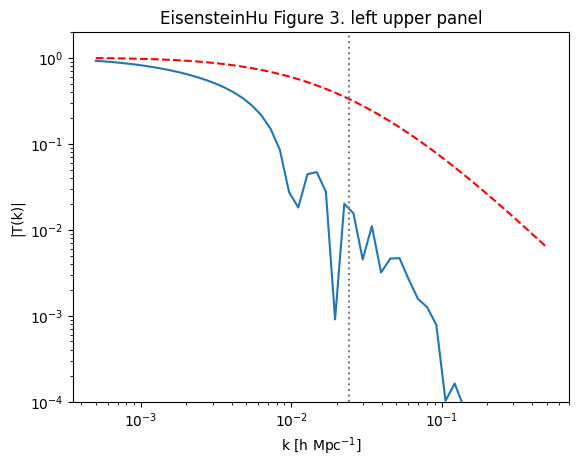

In [2]:
om0h2 = 0.2*0.5**2
ombh2 = om0h2*1
pars = EisensteinHu(ombh2=ombh2, omch2=om0h2-ombh2, h=0.5)
karr = np.logspace(-3,0,50)
p= np.abs(pars.Transfer_function(karr))
loc = pars.first_peak()
q = pars.Transfer_function_zero_baryon(karr)
plt.plot(karr*0.5, p)
plt.plot(karr*0.5, q, linestyle='--', color='red')
plt.axvline(loc*0.5, linestyle=':', color='gray')
plt.ylim(1e-4,2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k [h Mpc$^{-1}$]')
plt.ylabel('|T(k)|')
plt.title('EisensteinHu Figure 3. left upper panel')
plt.savefig('./figs/EH_figure3_left_upper.png', dpi=300)
plt.show()

In [3]:
om0h2 = 0.13348568
ombh2 = 0.02258368
#ombh2 = 0.01*0.5**2
omch2 = om0h2 - ombh2
pars2 =  EisensteinHu(ombh2=ombh2, omch2=omch2, h=0.71, TCMB=2.725)
pars2_params = pars2.print_params()

ombh2: 0.02258368
omch2: 0.110902
omlambh2: 0.6889
omRh2: 0.0
h: 0.71
mnu: 0.0
ns: 0.965
As: 2e-09
tau: 0.0632
TCMB: 2.725


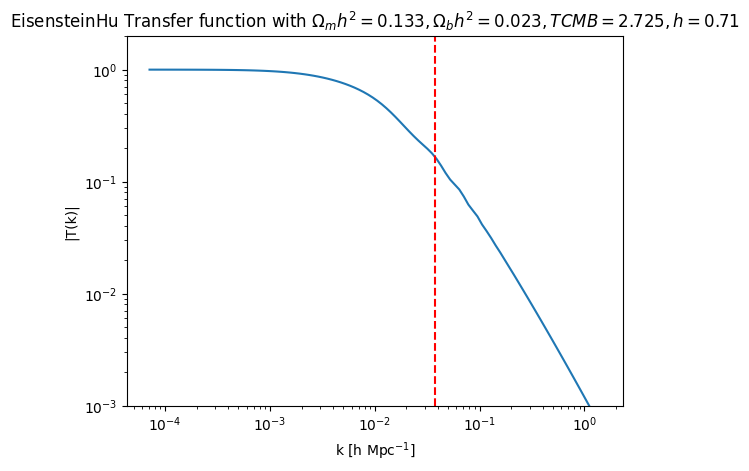

In [4]:

karr = np.logspace(-4,np.log10(2),100)
kharr = karr*pars2.h

p= pars2.Transfer_function(karr)
loc = pars2.first_peak()
plt.plot(kharr, p, label = 'EisensteinHu')
#plt.plot(karr*pars2.h, q, linestyle='--', color='red')
plt.axvline(loc*pars2.h, color='r', linestyle='--', label=f'First Peak at k={loc:.3f} hMpc$^{{-1}}$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,2)
plt.xlabel('k [h Mpc$^{-1}$]')
plt.ylabel('|T(k)|')
plt.title(rf'EisensteinHu Transfer function with $\Omega_mh^2 = {pars2.om0h2:.3f}, \Omega_bh^2 = {pars2.ombh2:.3f}, TCMB = {pars2.TCMB:.3f}, h = {pars2.h:.2f}$')
plt.savefig('./figs/EH_Transfer_CAMB_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

ombh2: 0.0225
omch2: 0.0525
omlambh2: 0.175
omRh2: 0.0
h: 0.5
mnu: 0.0
ns: 0.965
As: 2e-09
tau: 0.0632
TCMB: 2.725
om0h2: 0.075


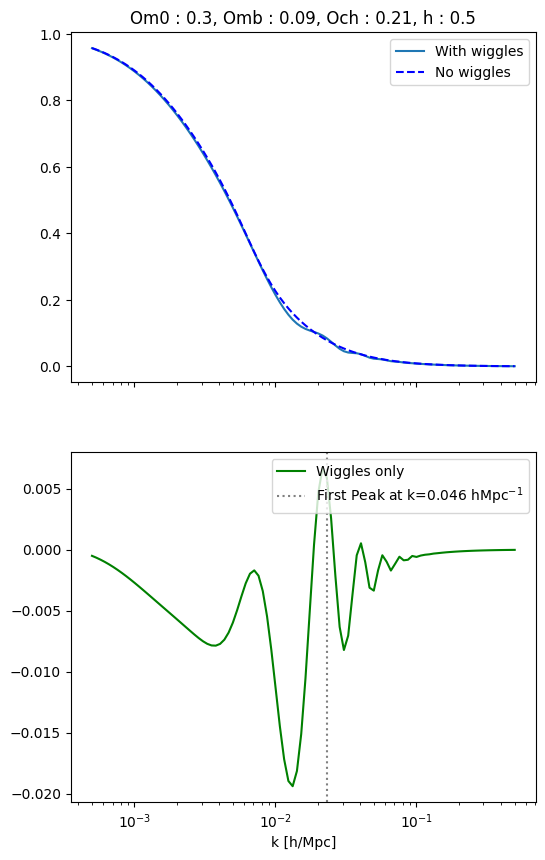

In [13]:
parmtest = {
    'om0h2' : 0.3*0.5**2.,
    'ombh2' : 0.3*0.3*0.5**2.,
    'omch2' : 0.3*0.7*0.5**2.,
    'h' : 0.5,
    'omlambh2' : 0.7*0.5**2.
}
parstest = EisensteinHu(**parmtest)
parstest_parm = parstest.print_params()
karr = np.logspace(-3,0,100)
p = parstest.Transfer_function(karr)
p_nowiggle = parstest.Transfer_function_nowiggles(karr)
p_zero_baryon = parstest.Transfer_function_zero_baryon(karr)
fig, ax = plt.subplots(2,1, figsize=(6,10), sharex=True)
ax[0].semilogx(karr*parstest.h, p, label='With wiggles')
ax[0].semilogx(karr*parstest.h, p_nowiggle, label='No wiggles', linestyle='--', color='blue')
ax[1].semilogx(karr*parstest.h, p - p_nowiggle, label='Wiggles only', color='green')
ax[1].set_xlabel('k [h/Mpc]')
ax[1].axvline(parstest.first_peak()*parstest.h, linestyle=':', color='gray', label=f'First Peak at k={parstest.first_peak():.3f} hMpc$^{{-1}}$')
ax[0].legend()
ax[1].legend()
ax[0].set_title('Om0 : 0.3, Omb : 0.09, Och : 0.21, h : 0.5')
plt.savefig('./figs/EH_wiggles_nowiggles.png', dpi=300, bbox_inches='tight')

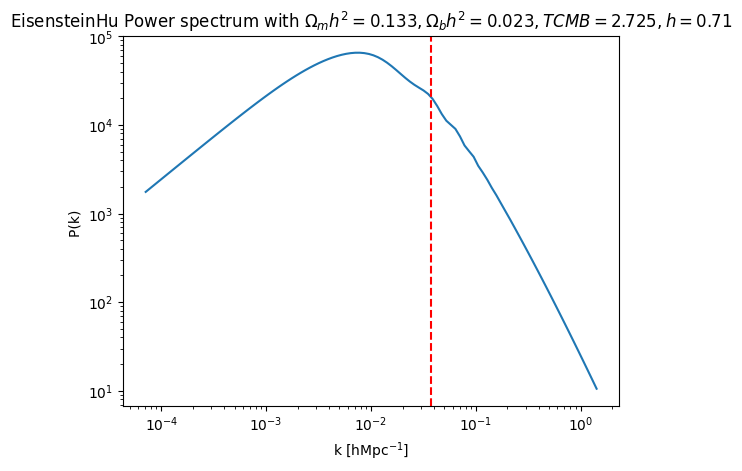

In [6]:
karr2 = np.logspace(-4,np.log10(2),100)
kharr2 = karr2*pars2.h
ps = pars2.Power_spectrum_0(karr2)
plt.loglog(kharr2, ps)
plt.axvline(loc*pars2.h, color='r', linestyle='--', label=f'First Peak at k={loc:.3f} hMpc$^{{-1}}$')
plt.xlabel('k [hMpc$^{-1}$]')
plt.ylabel('P(k) ')
plt.title(rf'EisensteinHu Power spectrum with $\Omega_mh^2 = {pars2.om0h2:.3f}, \Omega_bh^2 = {pars2.ombh2:.3f}, TCMB = {pars2.TCMB:.3f}, h = {pars2.h:.2f}$')
plt.savefig('./figs/EH_Power_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

/Users/john1256/KASI_Ms/2025/Field_research_2/Powerspec.py:181: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  D1 = 5/2 * self.om0 * H0**2 * Hubble * spi.quad(lambda a: 1/(a*Hubble)**3,0,a)[0] # [6.10]


Rescaling power spectrum... sigma8 = 0.0020660263969862805


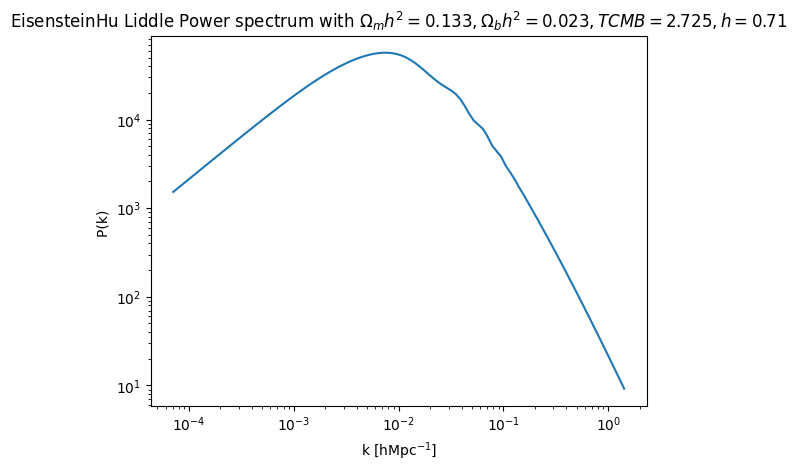

In [7]:
psliddle = pars2.Power_spectrum_liddle(1, karr2, rescale=True)
plt.loglog(kharr2, psliddle)
plt.xlabel('k [hMpc$^{-1}$]')
plt.ylabel('P(k) ')
plt.title(rf'EisensteinHu Liddle Power spectrum with $\Omega_mh^2 = {pars2.om0h2:.3f}, \Omega_bh^2 = {pars2.ombh2:.3f}, TCMB = {pars2.TCMB:.3f}, h = {pars2.h:.2f}$')
plt.savefig('./figs/EH_Power_spectrum_liddle.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
pars_CAMB = camb.CAMBparams()
H0 = pars2.h * 100
pars_CAMB.set_cosmology(
    ombh2 = pars2_params['ombh2'],
    omch2 = pars2_params['omch2'],
    H0 = H0,
    TCMB=pars2_params['TCMB'],
    omk=0.0,
    mnu=0.0
)
pars_CAMB.set_dark_energy() #re-set defaults
pars_CAMB.InitPower.set_params(As=pars2.As,ns=pars2.ns)
pars_CAMB.set_matter_power(redshifts=[0], kmax=10)
results = camb.get_results(pars_CAMB)

Text(0.5, 1.0, 'Matter transfer functions from CAMB')

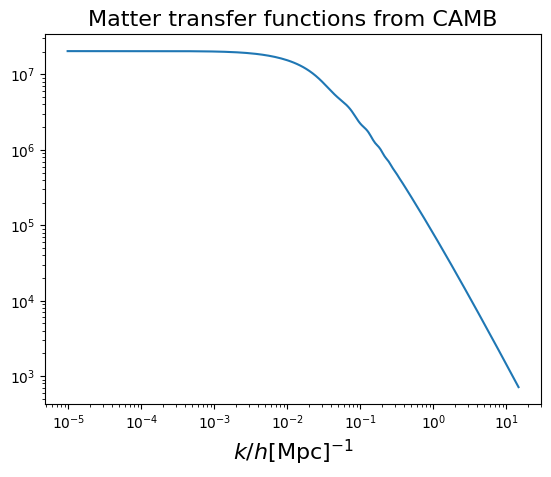

In [9]:
from camb import model

trans = results.get_matter_transfer_data()
kh = trans.transfer_data[0, :, 0]
delta = trans.transfer_data[model.Transfer_tot - 1, :, 0]
plt.loglog(kh, delta)
plt.xlabel(r'$k/h [ \rm Mpc]^{-1}$', fontsize=16)
plt.title('Matter transfer functions from CAMB', fontsize=16)

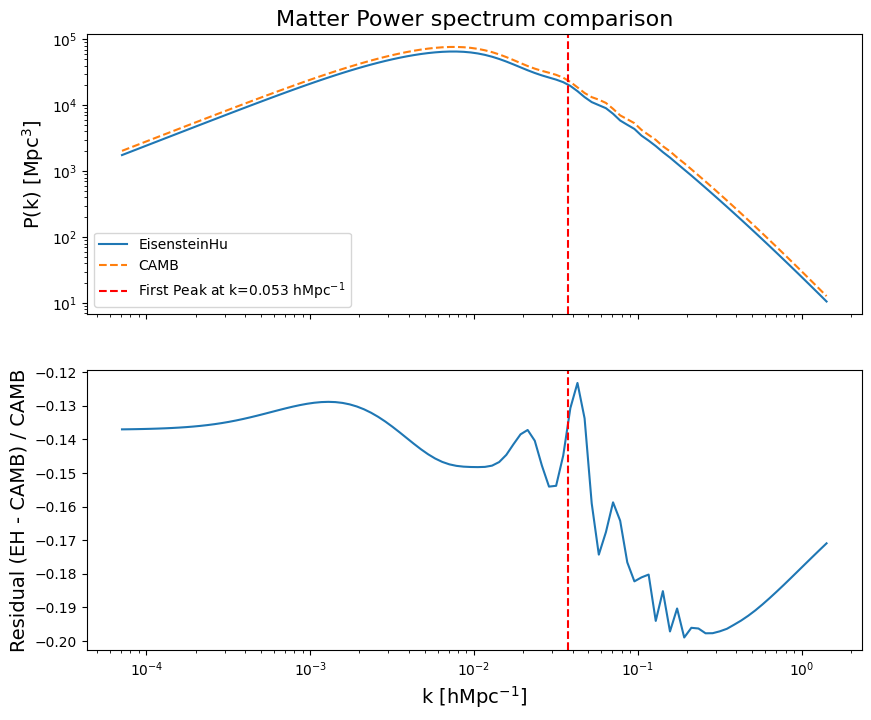

In [10]:
powerspec_camb = results.get_matter_power_interpolator(k_hunit=False, hubble_units=False, nonlinear=False)
pk = powerspec_camb.P(0, karr2)
residual = (ps - pk)/pk
fig, ax = plt.subplots(2,1, figsize=(10,8), sharex=True)
ax[0].loglog(kharr2, ps, label='EisensteinHu')
ax[0].loglog(kharr2, pk, label='CAMB', linestyle='--')
ax[0].axvline(loc*pars2.h, color='r', linestyle='--', label=f'First Peak at k={loc:.3f} hMpc$^{{-1}}$')
ax[0].set_ylabel('P(k) [Mpc$^3$]', fontsize=14)
ax[0].set_title(r'Matter Power spectrum comparison', fontsize=16)
ax[0].legend()
ax[1].semilogx(kharr2, residual)
ax[1].axvline(loc*pars2.h, color='r', linestyle='--', label=f'First Peak at k={loc:.3f} hMpc$^{{-1}}$')
ax[1].set_ylabel('Residual (EH - CAMB) / CAMB', fontsize=14)
ax[1].set_xlabel('k [hMpc$^{-1}$]', fontsize=14)
plt.savefig('./figs/EH_CAMB_Power_spectrum_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
